# Health Professional Shortage Areas (HPSAs) in Mississippi, Louisiana, & Alabama - Exploratory Data Analysis
---
### Drilling down: What are the characteristics of the HPSA counties in each state?
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from get_ms_la_al import shpsa

In [2]:
# Get info about shpsa dataframe
shpsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 7823 to 63646
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   HPSA Name                              139 non-null    object        
 1   Designation Type                       139 non-null    object        
 2   HPSA Score                             139 non-null    int64         
 3   HPSA Status                            139 non-null    object        
 4   HPSA Designation Date                  139 non-null    datetime64[ns]
 5   HPSA Designation Last Update Date      139 non-null    datetime64[ns]
 6   HPSA FTE                               139 non-null    float64       
 7   HPSA Designation Population            139 non-null    float64       
 8   % of Population Below 100% Poverty     139 non-null    float64       
 9   HPSA Formal Ratio                      136 non-null    objec

---
### Get a sense of the sample for each state...
* The overwhelming majority of HPSA counties in Mississippi are designated as High Needs.  About two-thirds of Alabama's HPSAs are High Needs.  Half of Louisiana's HPSAs are High Needs.
* For all states, the majority of HPSA counties are rural.

In [3]:
# Get total number of HPSA-designated counties for each state
shpsa.groupby('Common State Name')['HPSA Name'].count()

Common State Name
Alabama        49
Louisiana      36
Mississippi    54
Name: HPSA Name, dtype: int64

In [4]:
# Get counts based on need designation
shpsa.groupby(['Common State Name', 'Designation Type'])['HPSA Name'].count()

Common State Name  Designation Type          
Alabama            Geographic HPSA               17
                   High Needs Geographic HPSA    32
Louisiana          Geographic HPSA               18
                   High Needs Geographic HPSA    18
Mississippi        Geographic HPSA                6
                   High Needs Geographic HPSA    48
Name: HPSA Name, dtype: int64

In [5]:
# Get counts based on rurality
shpsa.groupby(['Common State Name', 'Rural Status'])['HPSA Name'].count()

Common State Name  Rural Status   
Alabama            Non-Rural           2
                   Partially Rural     6
                   Rural              41
Louisiana          Non-Rural           4
                   Partially Rural     5
                   Rural              27
Mississippi        Non-Rural           1
                   Partially Rural     1
                   Rural              52
Name: HPSA Name, dtype: int64

---
### For each state, what does the distribution of HPSA Scores look like across counties?
#### **Answer: All three states have similar distributions, however, Mississipi & Alabama have more counties with HPSA scores greater than 20 (i.e. greater degree of need).**

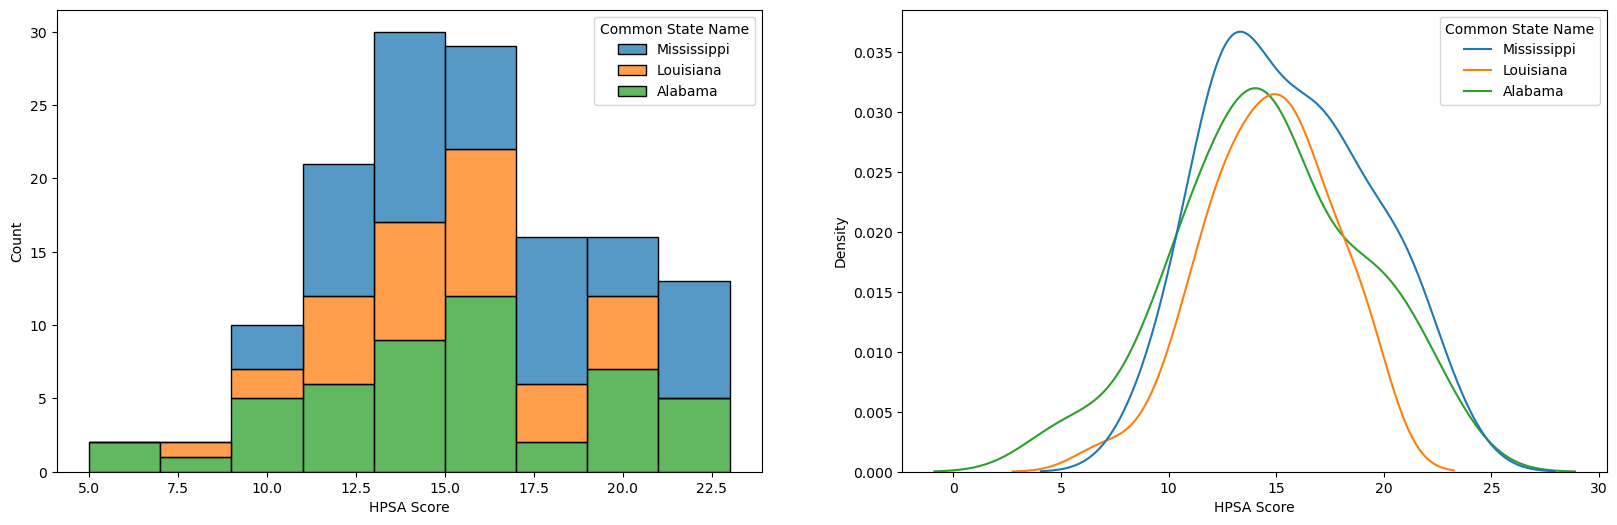

In [6]:
# Create a histogram and KDE plot of HPSA Score for each state
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.histplot(shpsa, x = 'HPSA Score', hue = 'Common State Name', multiple = 'stack')

plt.subplot(1, 2, 2)
sns.kdeplot(shpsa, x = 'HPSA Score', hue = 'Common State Name')

plt.show()

---
### For each state, what does the distribution of % of Population Below 100% Poverty look like across counties?
#### **Answer: Mississippi has a greater proportion of counties with >20% of their population below the federal poverty level compared to Louisiana & Alabama.**

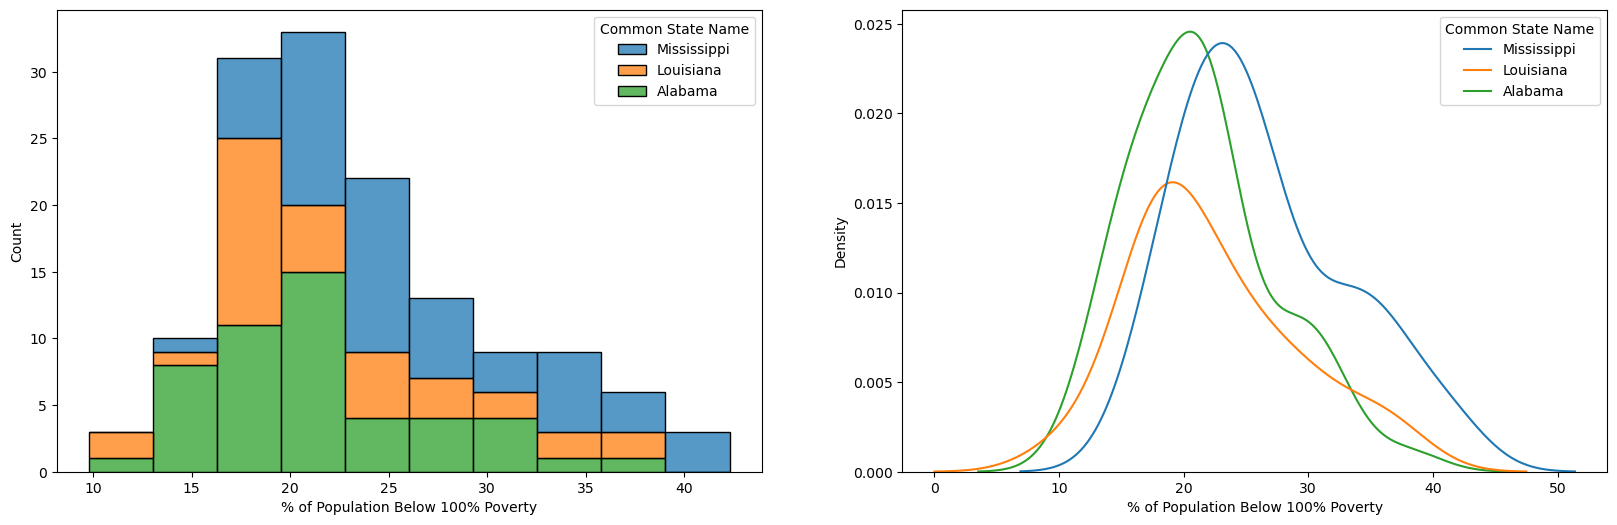

In [7]:
# Create a histogram and KDE plot of % of Population Below 100% Poverty for each state
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.histplot(shpsa, x = '% of Population Below 100% Poverty', hue = 'Common State Name', multiple = 'stack')

plt.subplot(1, 2, 2)
sns.kdeplot(shpsa, x = '% of Population Below 100% Poverty', hue = 'Common State Name')

plt.show()

---
### For each state, what does the distribution of the number of FTE practitioners needed per county look like across counties?
#### **Answer: Most counties need about 1-2 FTE practioners across all three states.  However, there are some counties in Louisiana & Alabama that need >10 FTEs.**

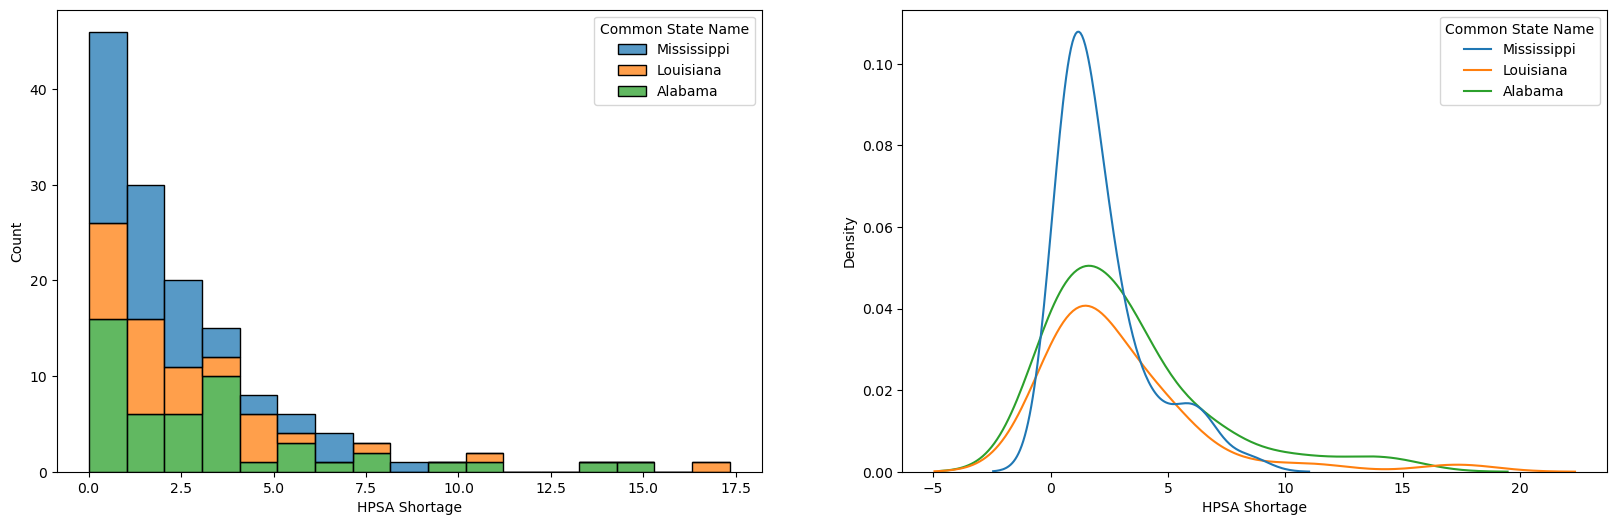

In [8]:
# Create a histogram and KDE plot of HPSA Shortage for each state
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.histplot(shpsa, x = 'HPSA Shortage', hue = 'Common State Name', multiple = 'stack')

plt.subplot(1, 2, 2)
sns.kdeplot(shpsa, x = 'HPSA Shortage', hue = 'Common State Name')

plt.show()

---
### Are there any correlations between measures across states?  Are there any differences that stick out?
#### **Answer: There is a very strong correlation between the number of people in a county affected by the shortage (`HPSA Designation Population`) and the number of FTEs needed to resolve the shortage (`HPSA Shortage`) in Louisiana (r = 0.82), compared to Mississippi (r = 0.59) and Alabama (r = 0.59).**

In [9]:
measures = ['HPSA Score', 'HPSA FTE', 'HPSA Designation Population', '% of Population Below 100% Poverty',
                'HPSA Estimated Served Population', 'HPSA Estimated Underserved Population', 'HPSA Shortage']

# Create an empty dictionary to store the Pearson correlation matrices for each state
corr_matrices = {}
states = ['Mississippi', 'Louisiana', 'Alabama']

# Compute a Pearson correlation matrix for each state and assign to corr_matrices
for state in states:
    corr_matrices[state] = shpsa[shpsa['Common State Name'] == state][measures].corr('pearson')

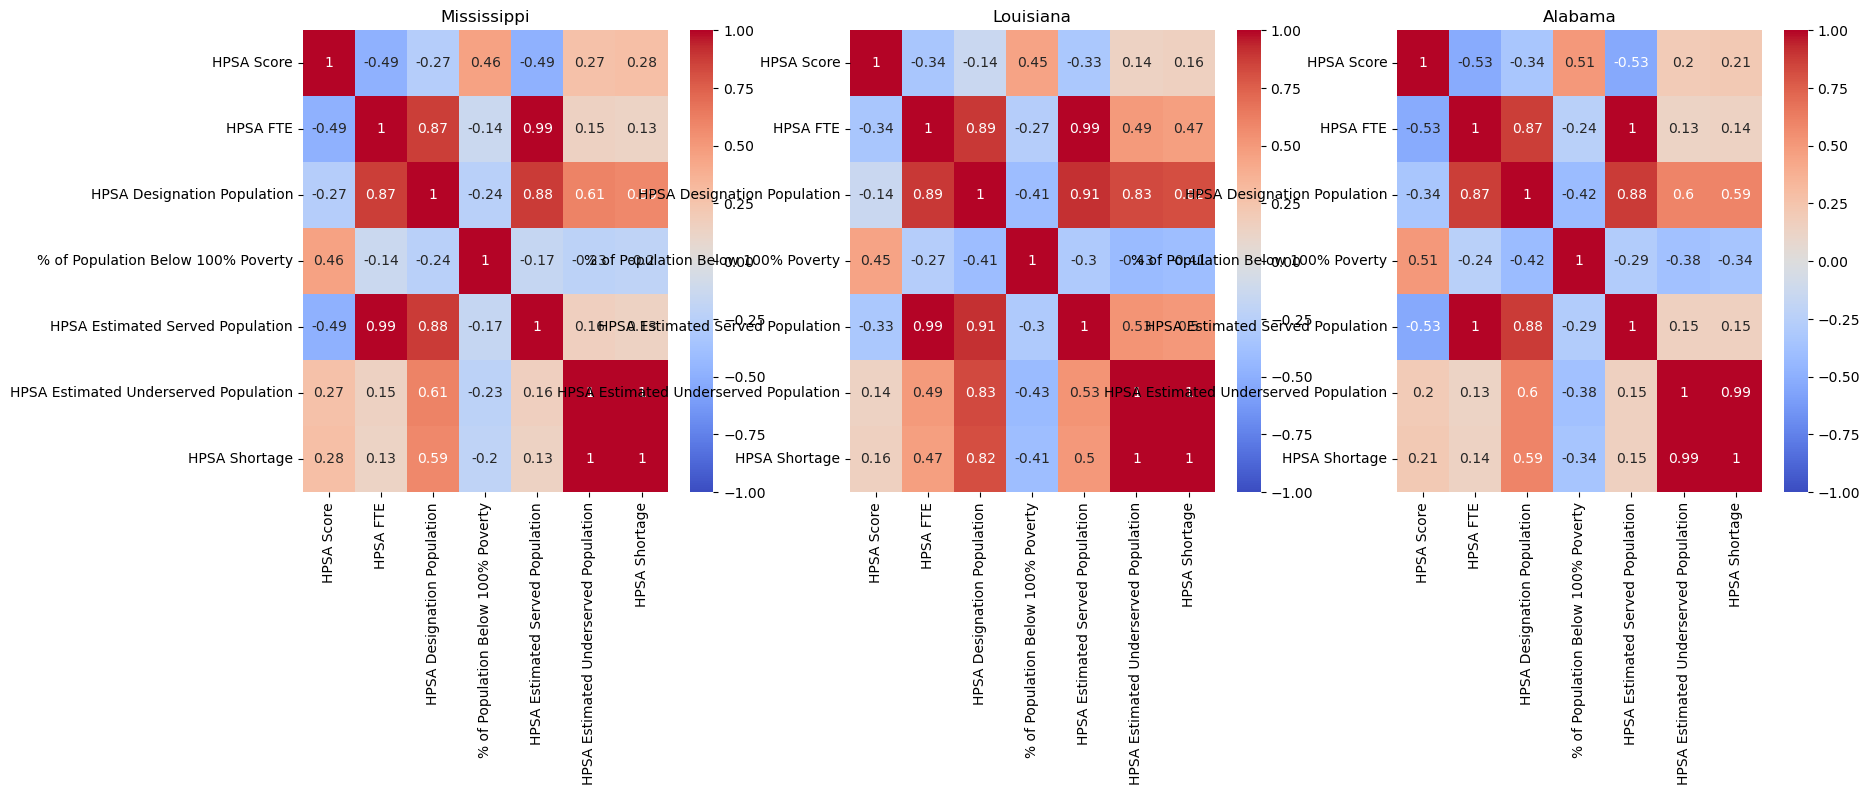

In [10]:
# Plot a heatmap for each correlation matric in corr_matrices
plt.figure(figsize = (20, 6))

for i in range(len(states)):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(corr_matrices[states[i]], vmin = -1.0, vmax = 1.0,
                annot = True, cmap = 'coolwarm').set(title = states[i])

plt.show()

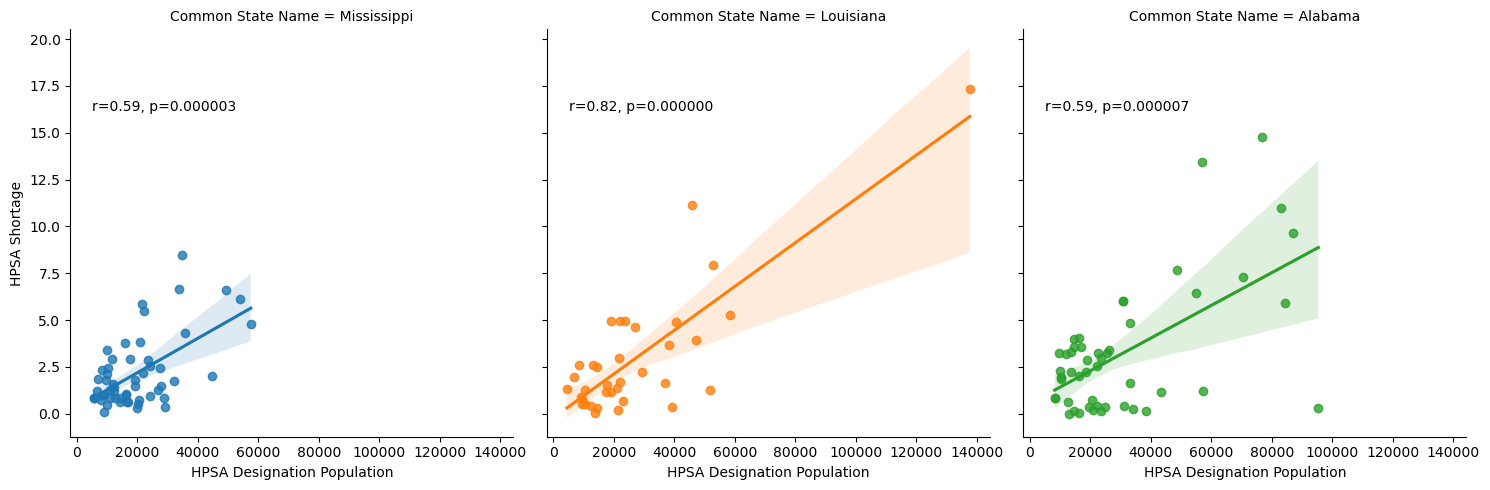

In [11]:
# Define a function annotate that gets the current plot in the grid and annotates the pearson r and p-value onto the plot
def annotate(data, x, y, **kws):
    bool_mask = (data[x].notna()) & (data[y].notna())
    r, p = sp.stats.pearsonr(data.loc[bool_mask, x], data.loc[bool_mask, y])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.6f}'.format(r, p), transform = ax.transAxes)

# Create scatterplots for each state
scatter = sns.lmplot(shpsa, x = 'HPSA Designation Population', y = 'HPSA Shortage',
                     col = 'Common State Name', hue = 'Common State Name')

# Plot the Pearson r values and p values
scatter.map_dataframe(annotate, x = 'HPSA Designation Population', y = 'HPSA Shortage')

plt.show()